<a href="https://colab.research.google.com/github/sahanas0/SSURE103_CatDogImageIdentification/blob/main/SSURE103_CatDogIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

# Set up kaggle auth
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
import kagglehub
path = kagglehub.dataset_download("tongpython/cat-and-dog")
print("Path to dataset files:", path)

# Set up paths
import os
train_dir = os.path.join(path, "training_set")

KeyboardInterrupt: 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Image settings
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10

# Data preprocessing with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load pre-trained MobileNetV2 model (frozen base)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Custom top layers with dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

Found 6404 images belonging to 1 classes.
Found 1601 images belonging to 1 classes.


/tmp/ipython-input-2-1658446945.py:45: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9236 - loss: 0.1727 - val_accuracy: 1.0000 - val_loss: 4.1204e-04
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 198s 986ms/step - accuracy: 1.0000 - loss: 9.1525e-04 - val_accuracy: 1.0000 - val_loss: 1.5972e-04
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 1.0000 - loss: 3.8228e-04 - val_accuracy: 1.0000 - val_loss: 7.6345e-05
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 1.0000 - loss: 1.9923e-04 - val_accuracy: 1.0000 - val_loss: 4.4562e-05
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 1.0000 - loss: 1.2750e-04

KeyboardInterrupt: 

Accuracy + Loss Graphs:

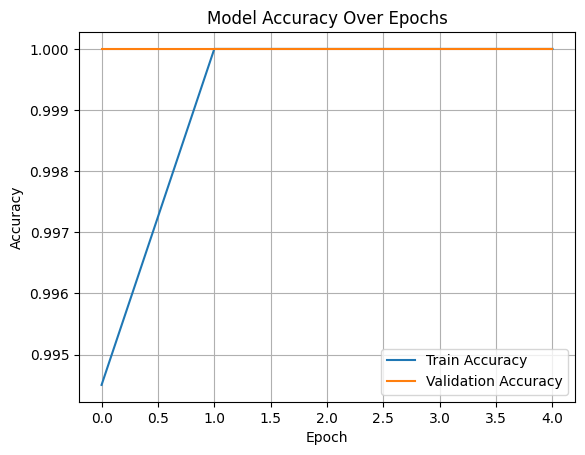

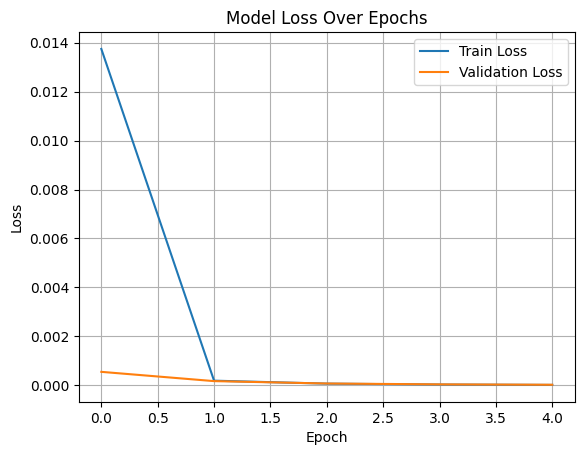

In [ ]:
# Plot accuracy and loss graphs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")
